In [65]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import datetime
import mplfinance as mpf
import ta

'''
To import mplfinance and ta libraries, you need to install packages:

!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
!pip install --upgrade mplfinance
!pip install ta
'''

In [34]:
os.chdir('<YOUR DATA PATH>')
df = pd.read_excel('EXCEL FILE')

In [35]:
df.head()

,open time,open,high,low,close,volume,close time,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,1672531200000,0.3389,0.3400,0.3354,0.3387,102026821,1672617599999,3.447164e+07,48661,53592277,1.810790e+07
1,1672617600000,0.3386,0.3555,0.3000,0.3482,647520487,1672703999999,2.178040e+08,285660,320823575,1.080569e+08
2,1672704000000,0.3482,0.3520,0.3395,0.3436,346410334,1672790399999,1.195113e+08,154113,172318472,5.944846e+07
3,1672790400000,0.3436,0.3605,0.3390,0.3472,372672796,1672876799999,1.295853e+08,147677,193027855,6.713928e+07
4,1672876800000,0.3471,0.3487,0.3333,0.3380,265529668,1672963199999,9.073585e+07,106910,129294274,4.418781e+07


In [36]:
#Summary statistics
df.describe()

,open time,open,high,low,close,volume,close time,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.650000e+02,365.000000,365.000000,365.000000,365.000000,3.650000e+02,3.650000e+02,3.650000e+02,3.650000e+02,3.650000e+02,3.650000e+02
mean,1.688256e+12,0.511488,0.524519,0.497176,0.512253,3.672345e+08,1.688342e+12,1.911952e+08,2.230758e+05,1.850950e+08,9.622049e+07
std,9.116121e+09,0.101647,0.106842,0.096777,0.101397,2.333914e+08,9.116121e+09,1.483029e+08,2.105543e+05,1.170136e+08,7.421981e+07
min,1.672531e+12,0.338000,0.340000,0.300000,0.338000,6.313711e+07,1.672618e+12,3.298534e+07,3.836700e+04,2.745739e+07,1.434515e+07
25%,1.680394e+12,0.442900,0.460100,0.422300,0.443800,2.379930e+08,1.680480e+12,1.135236e+08,1.213970e+05,1.205883e+08,5.733736e+07
50%,1.688256e+12,0.502800,0.510200,0.489400,0.503000,3.349302e+08,1.688342e+12,1.575266e+08,1.724040e+05,1.702654e+08,8.248994e+07
75%,1.696118e+12,0.604700,0.615000,0.577800,0.605400,4.337959e+08,1.696205e+12,2.244786e+08,2.513300e+05,2.188935e+08,1.130396e+08
max,1.703981e+12,0.819800,0.938000,0.771000,0.819900,2.499971e+09,1.704067e+12,1.758483e+09,2.895839e+06,1.283335e+09,9.024119e+08


In [40]:
# Convert open and close time from Epoch to date time

df['open time']=(pd.to_datetime(df['open time'],unit='ms'))
df['close time']=(pd.to_datetime(df['close time'],unit='ms'))

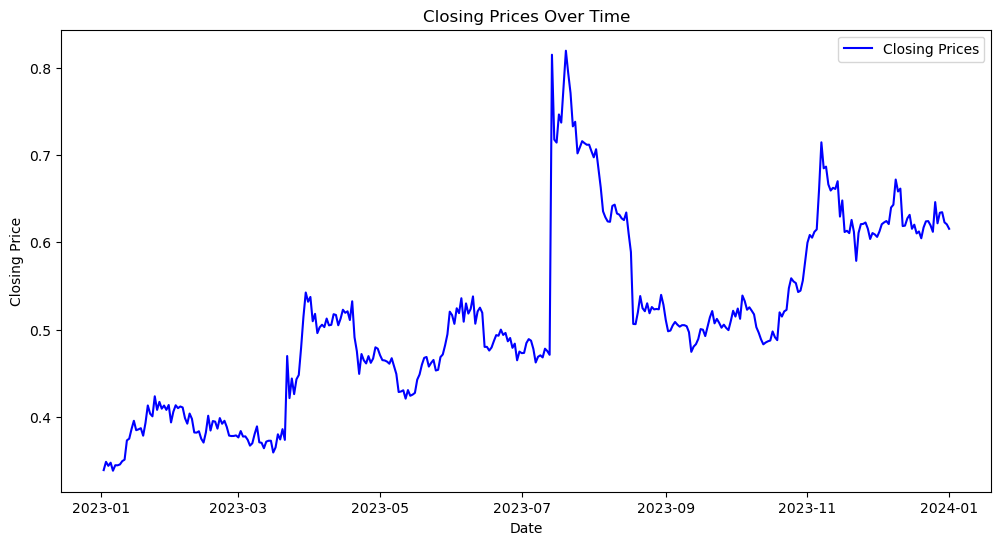

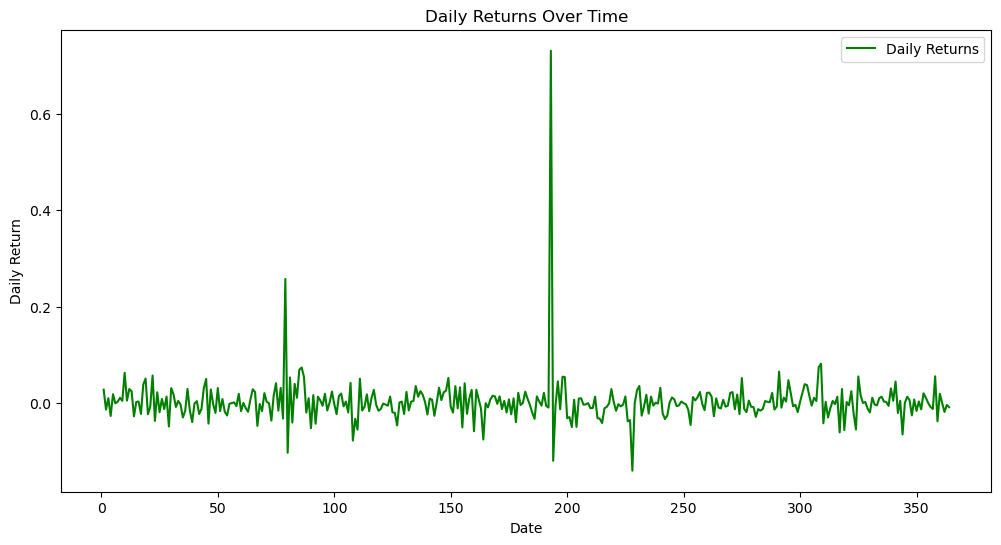

In [42]:
#trend analysis

plt.figure(figsize=(12, 6))
plt.plot(df['close time'], df['close'], label='Closing Prices', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

df['daily_return'] = df['close'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(df['daily_return'], label='Daily Returns', color='green')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


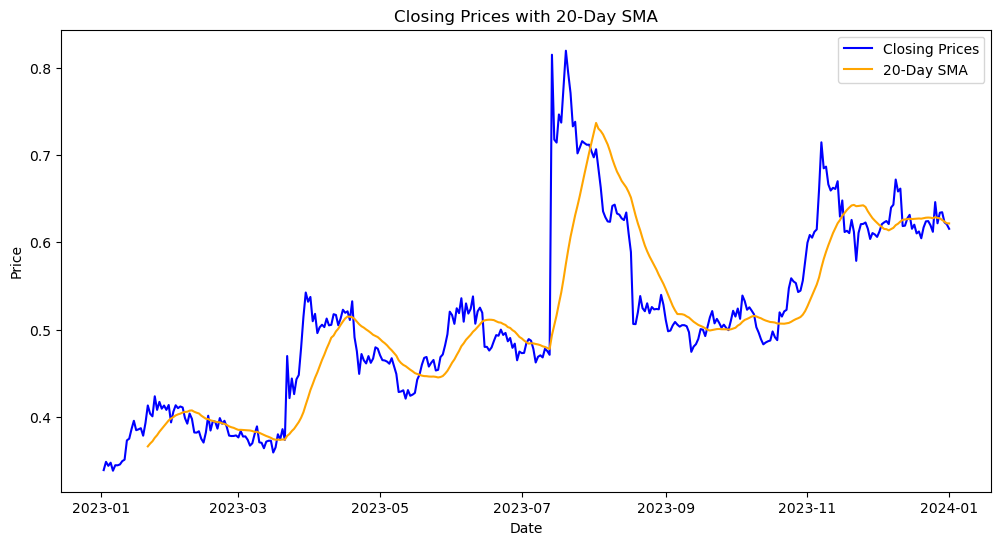

In [43]:
#20day SMA

df['SMA_20'] = df['close'].rolling(window=20).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['close time'], df['close'], label='Closing Prices', color='blue')
plt.plot(df['close time'], df['SMA_20'], label='20-Day SMA', color='orange')
plt.title('Closing Prices with 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

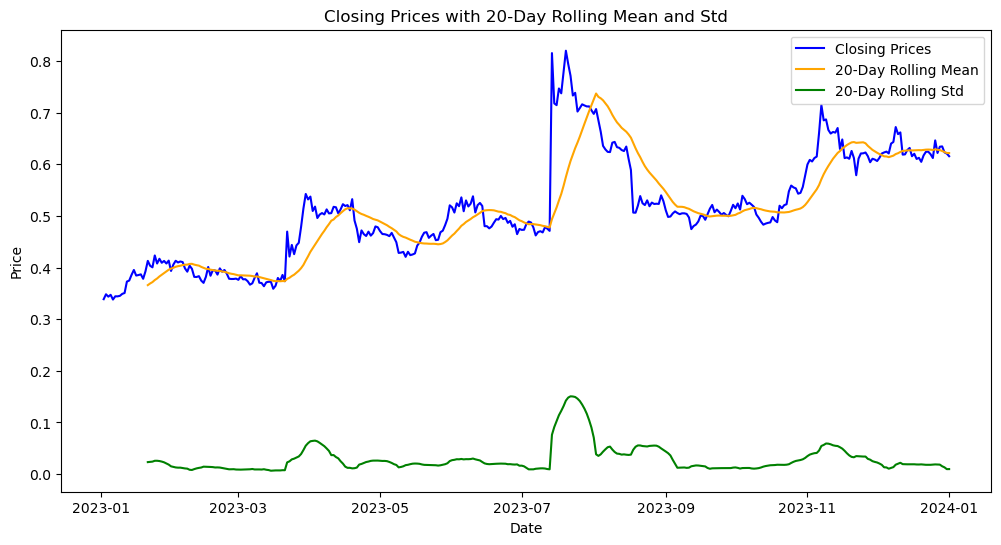

In [46]:
#rolling stats

window_size = 20  # you can adjust window size here
df['rolling_mean'] = df['close'].rolling(window=window_size).mean()
df['rolling_std'] = df['close'].rolling(window=window_size).std()

plt.figure(figsize=(12, 6))
plt.plot(df['close time'], df['close'], label='Closing Prices', color='blue')
plt.plot(df['close time'], df['rolling_mean'], label=f'{window_size}-Day Rolling Mean', color='orange')
plt.plot(df['close time'], df['rolling_std'], label=f'{window_size}-Day Rolling Std', color='green')

plt.title(f'Closing Prices with {window_size}-Day Rolling Mean and Std')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


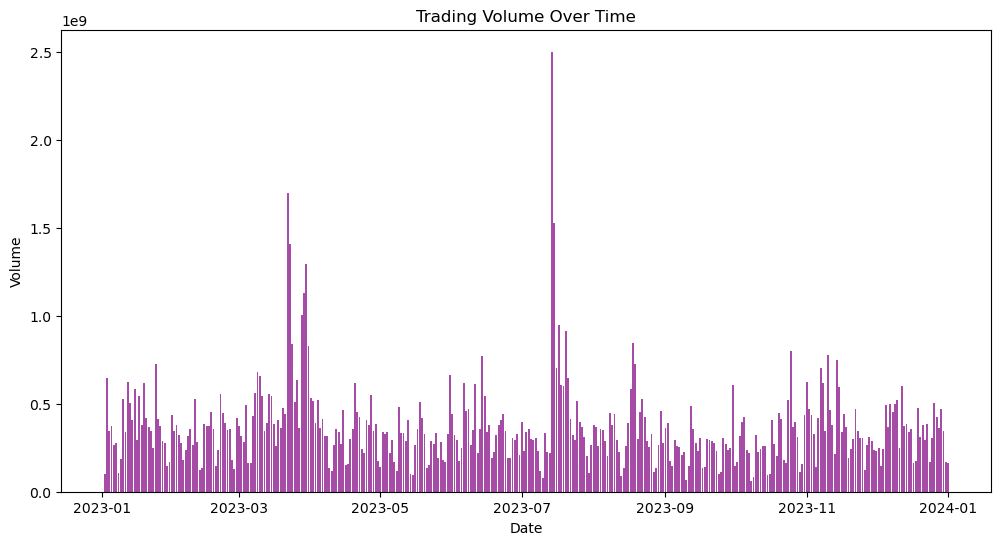

In [47]:
#volume analysis

plt.figure(figsize=(12, 6))
plt.bar(df['close time'],  df['volume'], color='purple', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


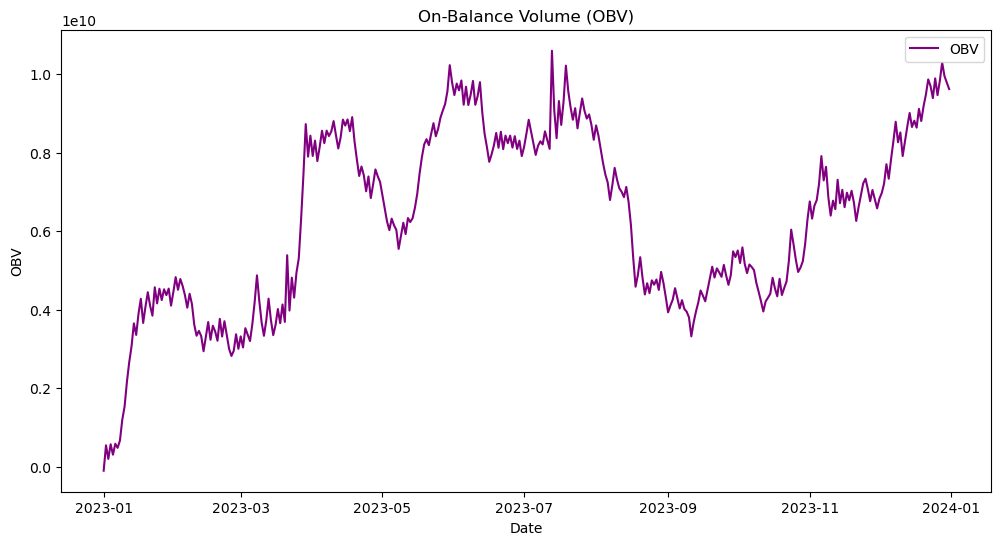

In [48]:
#OBV

df['daily_return'] = df['close'].pct_change()
df['obv'] = (df['volume'] * df['daily_return'].apply(lambda x: 1 if x > 0 else -1)).cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df['open time'], df['obv'], label='OBV', color='purple')
plt.title('On-Balance Volume (OBV)')
plt.xlabel('Date')
plt.ylabel('OBV')
plt.legend()
plt.show()


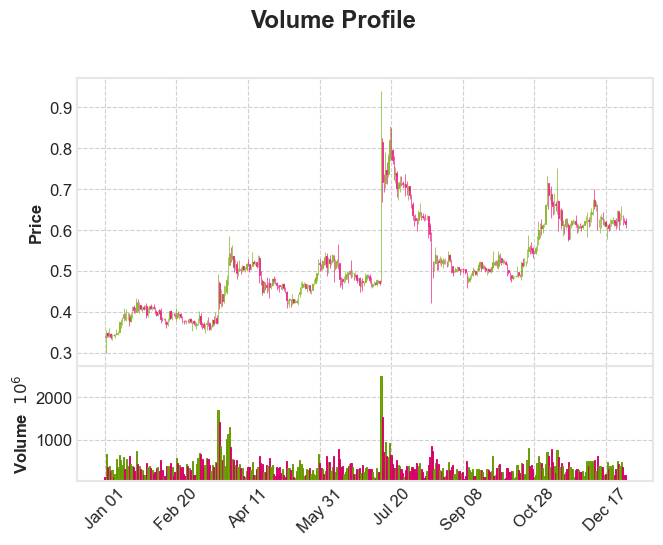

In [82]:
#volume profile
df['close time'] = pd.to_datetime(df['close time'])
df.set_index('close time', inplace=True)


ohlc_data = df[['open', 'high', 'low', 'close', 'volume']]

mpf.plot(ohlc_data, type='candle', volume=True, style='binance', title='Volume Profile')

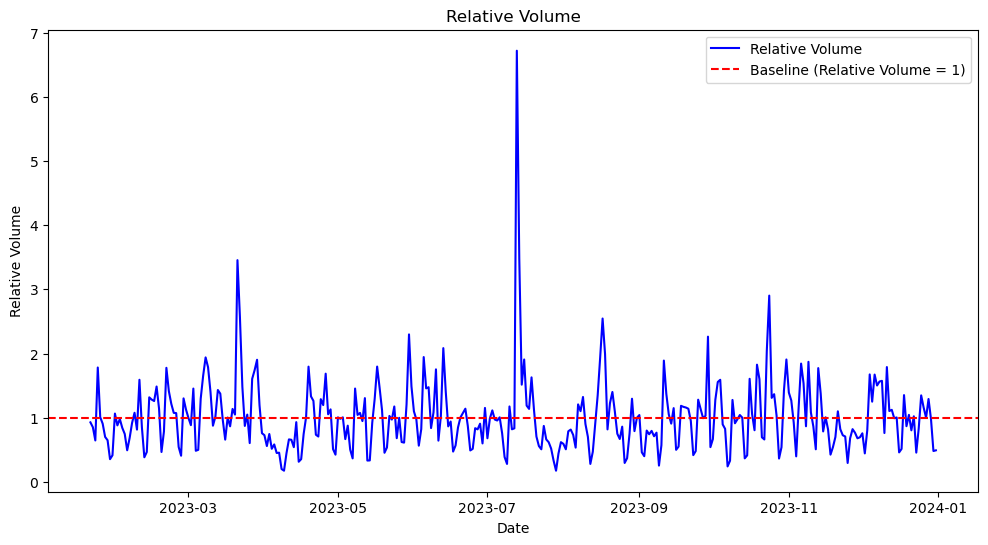

In [60]:
#relative volume

window_size = 20
df['rolling_avg_volume'] = df['volume'].rolling(window=window_size).mean()
df['relative_volume'] = df['volume'] / df['rolling_avg_volume']

plt.figure(figsize=(12, 6))
plt.plot(df['open time'], df['relative_volume'], label='Relative Volume', color='blue')
plt.axhline(y=1, color='red', linestyle='--', label='Baseline (Relative Volume = 1)')
plt.title('Relative Volume')
plt.xlabel('Date')
plt.ylabel('Relative Volume')
plt.legend()
plt.show()

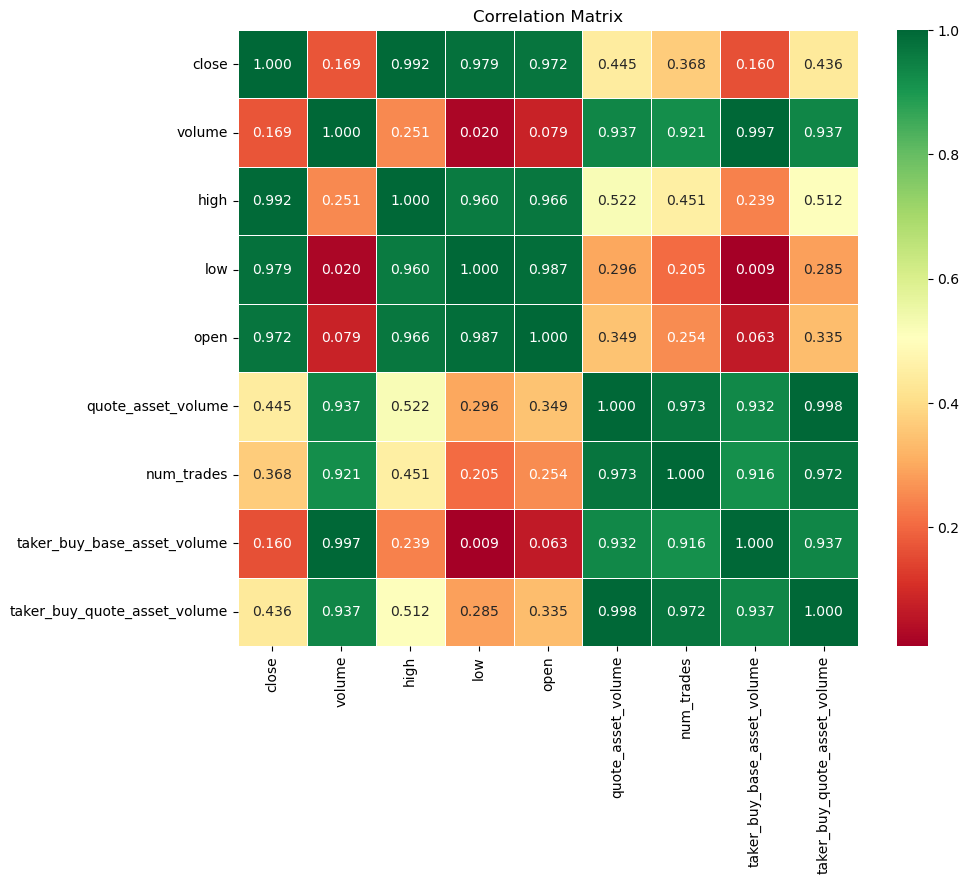

In [61]:
#correlation analysis

selected_columns = ['close', 'volume', 'high', 'low', 'open', 'quote_asset_volume',
                    'num_trades', 'taker_buy_base_asset_volume',
                    'taker_buy_quote_asset_volume']

selected_df = df[selected_columns]

correlation_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

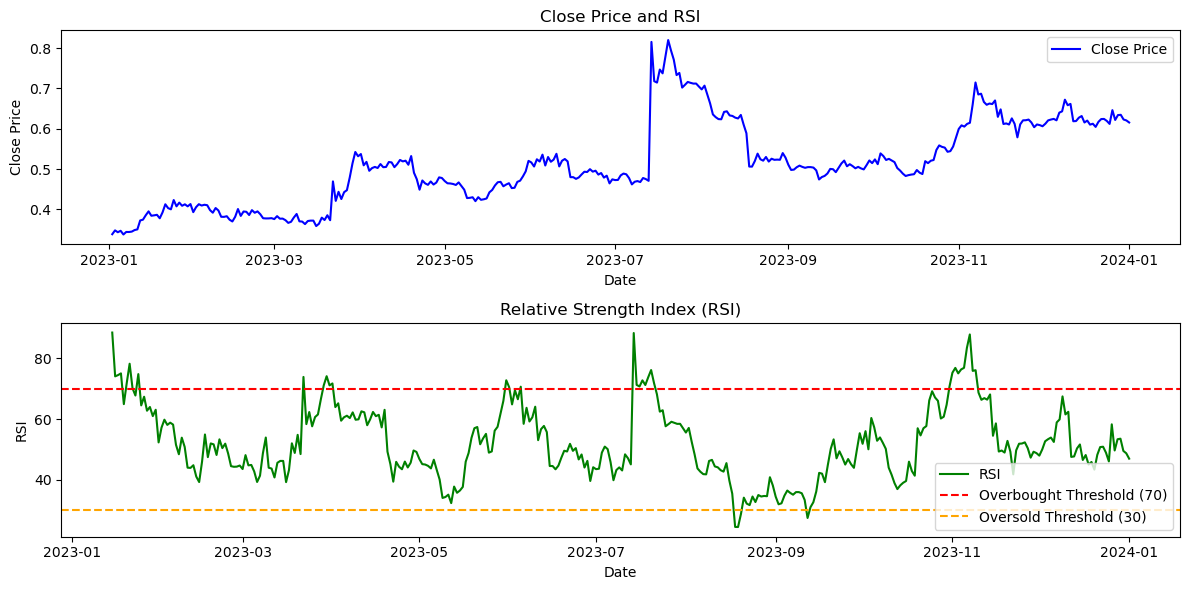

In [67]:
#RSI

df['rsi'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['close time'], df['close'], label='Close Price', color='blue')
plt.title('Close Price and RSI')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['close time'], df['rsi'], label='RSI', color='green')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought Threshold (70)')
plt.axhline(y=30, color='orange', linestyle='--', label='Oversold Threshold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()

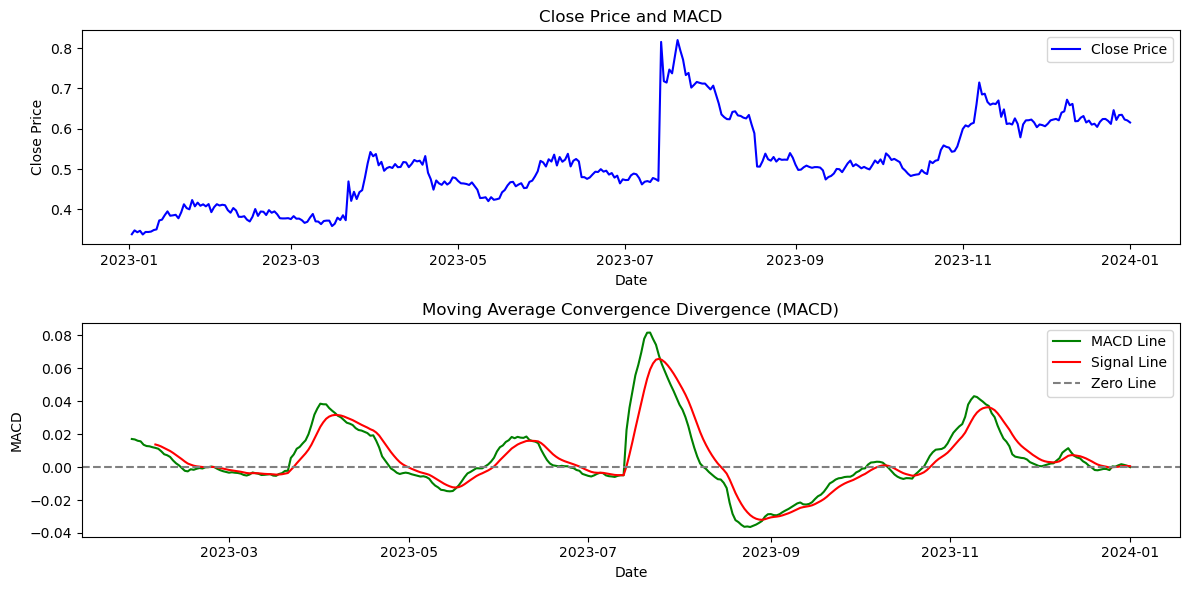

In [70]:
#MACD

macd = ta.trend.MACD(df['close'], window_slow=26, window_fast=12, window_sign=9)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['close time'], df['close'], label='Close Price', color='blue')
plt.title('Close Price and MACD')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['close time'], macd.macd(), label='MACD Line', color='green')
plt.plot(df['close time'], macd.macd_signal(), label='Signal Line', color='red')  # Corrected line
plt.axhline(y=0, color='gray', linestyle='--', label='Zero Line')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

plt.tight_layout()
plt.show()

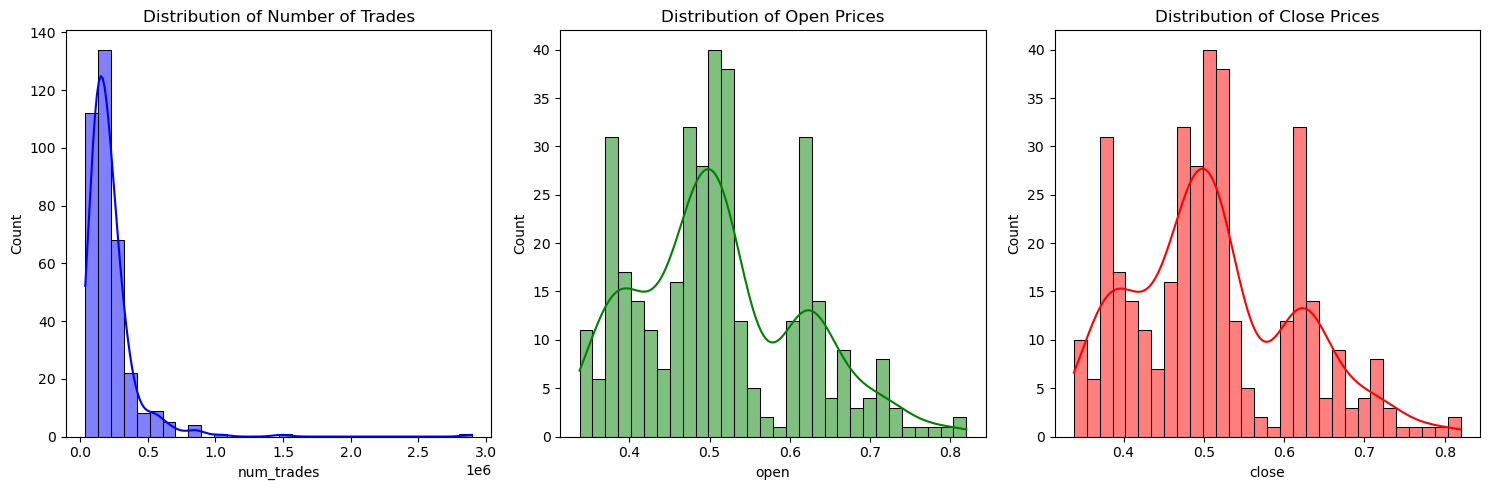

In [71]:
#open price close price and number of trades distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['num_trades'], bins=30, kde=True, color='blue')
plt.title('Distribution of Number of Trades')

plt.subplot(1, 3, 2)
sns.histplot(df['open'], bins=30, kde=True, color='green')
plt.title('Distribution of Open Prices')

plt.subplot(1, 3, 3)
sns.histplot(df['close'], bins=30, kde=True, color='red')
plt.title('Distribution of Close Prices')

plt.tight_layout()
plt.show()


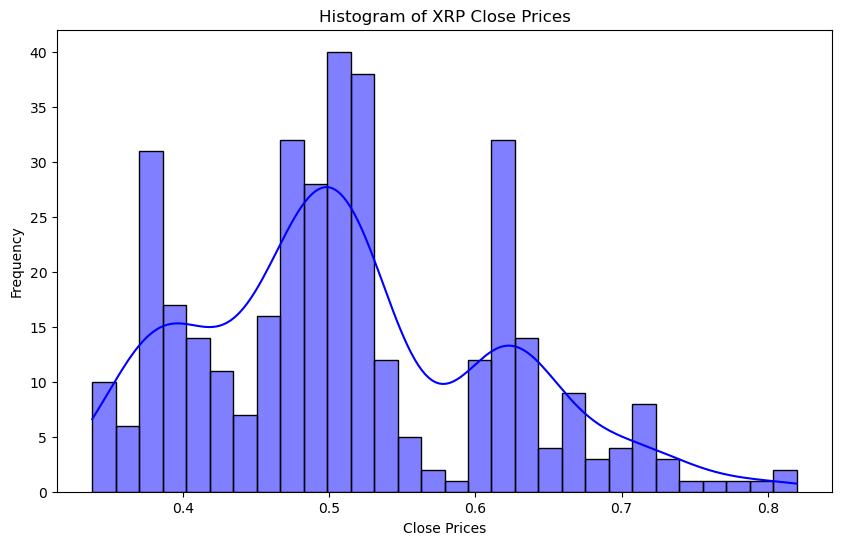

In [72]:
#close prices histogram without skewness
plt.figure(figsize=(10, 6))
sns.histplot(df['close'], bins=30, kde=True, color='blue')
plt.title('Histogram of XRP Close Prices')
plt.xlabel('Close Prices')
plt.ylabel('Frequency')
plt.show()

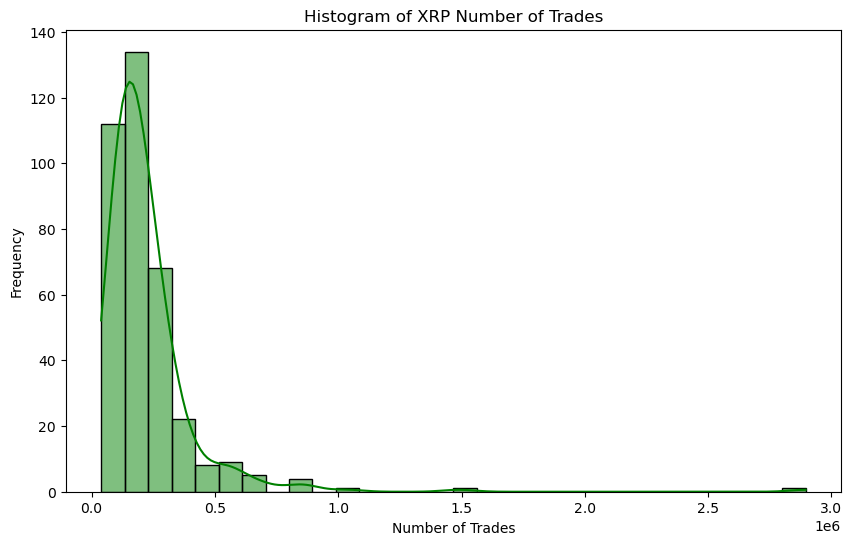

In [73]:
#No. of trades histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['num_trades'], bins=30, kde=True, color='green')
plt.title('Histogram of XRP Number of Trades')
plt.xlabel('Number of Trades')
plt.ylabel('Frequency')
plt.show()

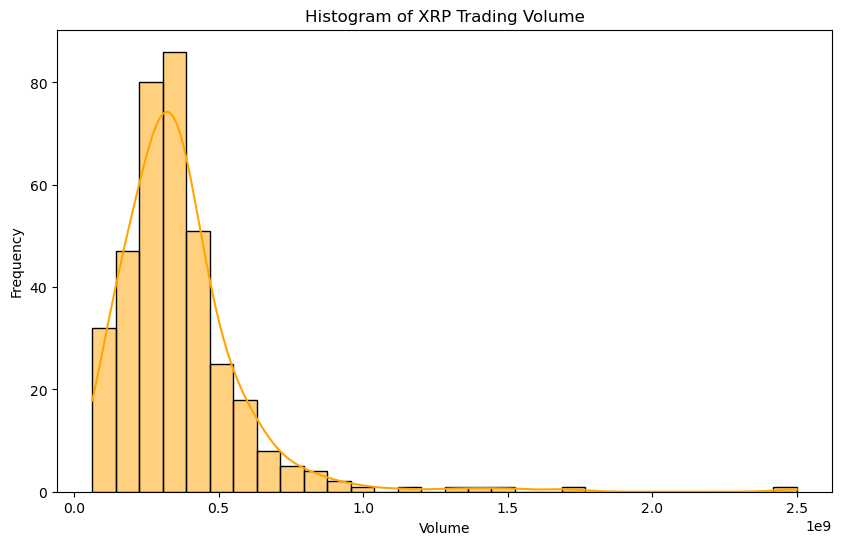

In [74]:
#trade volume histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['volume'], bins=30, kde=True, color='orange')
plt.title('Histogram of XRP Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

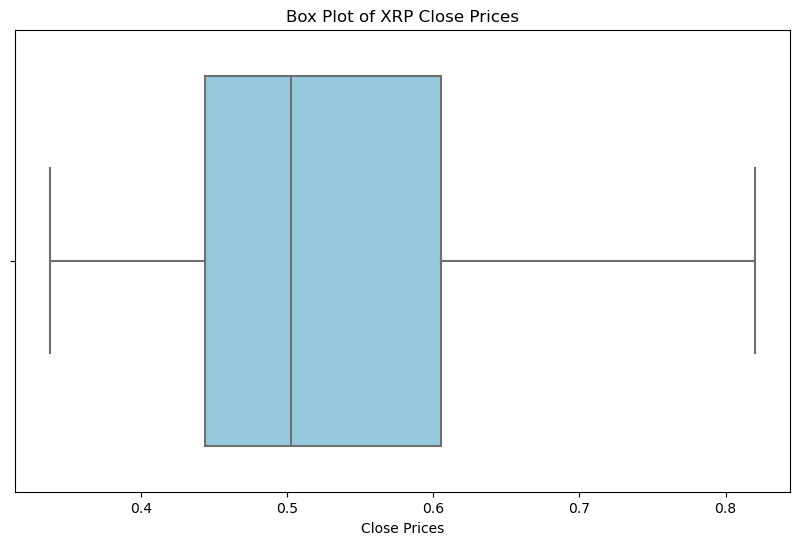

In [75]:
#close prices box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['close'], color='skyblue')
plt.title('Box Plot of XRP Close Prices')
plt.xlabel('Close Prices')
plt.show()

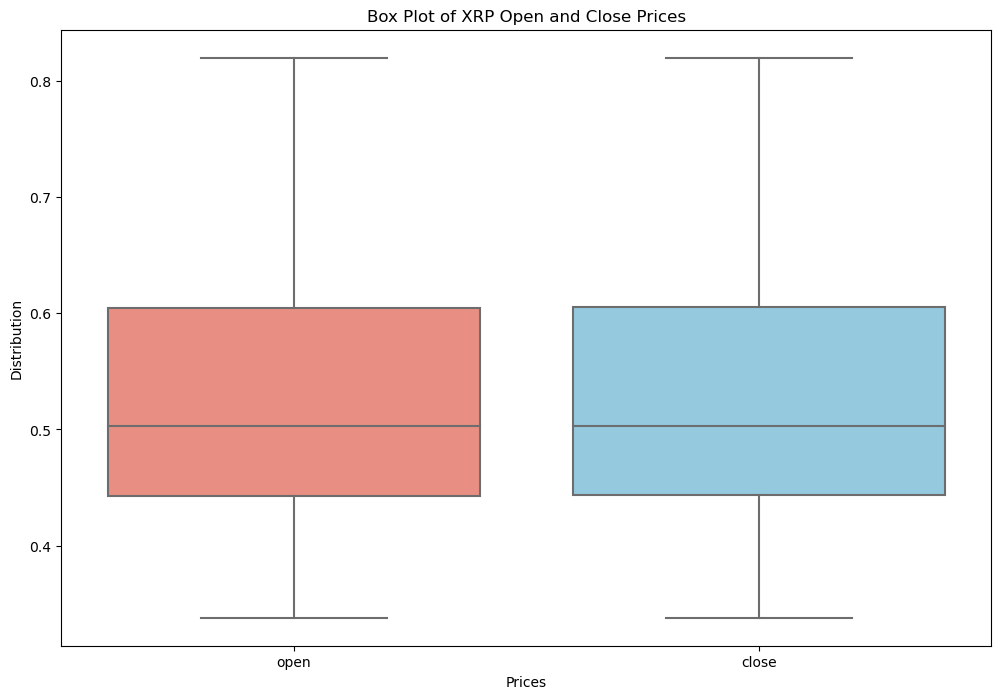

In [76]:
#box plot of open and close
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['open', 'close']], palette=['salmon', 'skyblue'])
plt.title('Box Plot of XRP Open and Close Prices')
plt.xlabel('Prices')
plt.ylabel('Distribution')
plt.show()

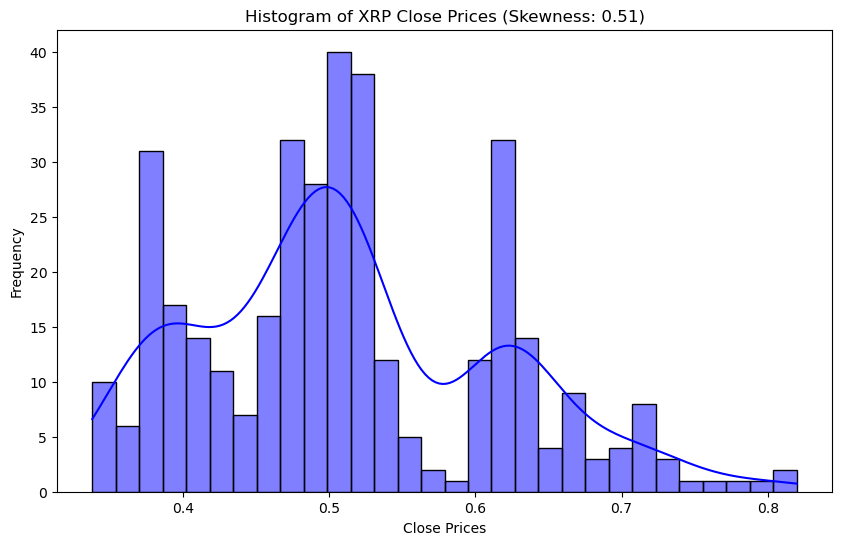

In [77]:
#histogram of close prices with skewness
skewness = df['close'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['close'], bins=30, kde=True, color='blue')
plt.title(f'Histogram of XRP Close Prices (Skewness: {skewness:.2f})')
plt.xlabel('Close Prices')
plt.ylabel('Frequency')
plt.show()

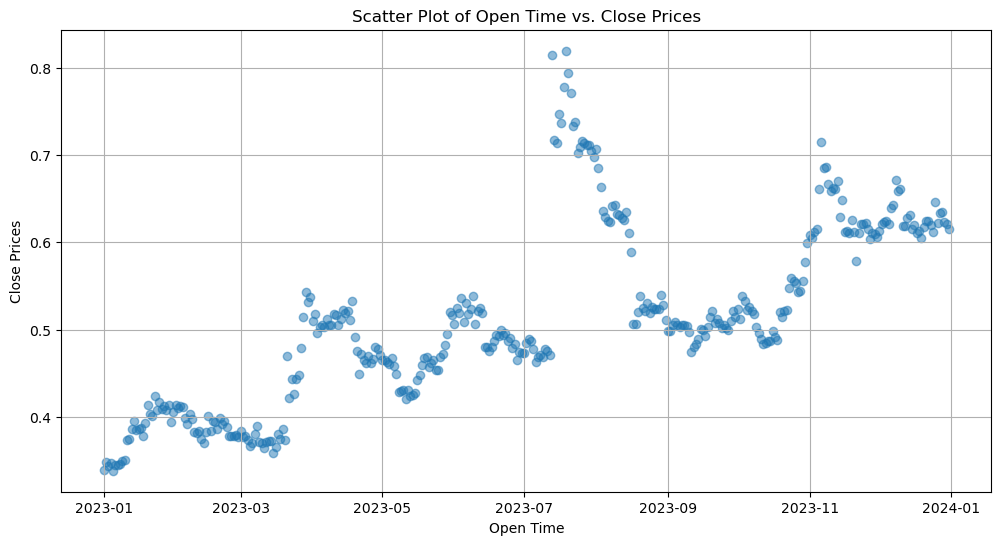

In [79]:
#scatter plot of close prices

plt.figure(figsize=(12, 6))
plt.scatter(df['open time'], df['close'], alpha=0.5)
plt.title('Scatter Plot of Open Time vs. Close Prices')
plt.xlabel('Open Time')
plt.ylabel('Close Prices')
plt.grid(True)
plt.show()